In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load the dataset 
df = pd.read_csv(r'..\data\Student_performance_data .csv')


## Understanding the Data

In [3]:
# basic info 
print("Columns:", df.columns) # displays the column names
print("Information:") 
print(df.info()) #displays dataset information         
print("Summary Statistics (Numerical):")
print(df.describe().T)# displays stats for numeric columns
print("Missing Values:", df.isnull().sum().sum())

Columns: Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int

## Exploratory Data Analysis

Univariate Analysis

In [4]:
# define the numerical and categorical features
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 
                       'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 
                       'Volunteering', 'GradeClass']

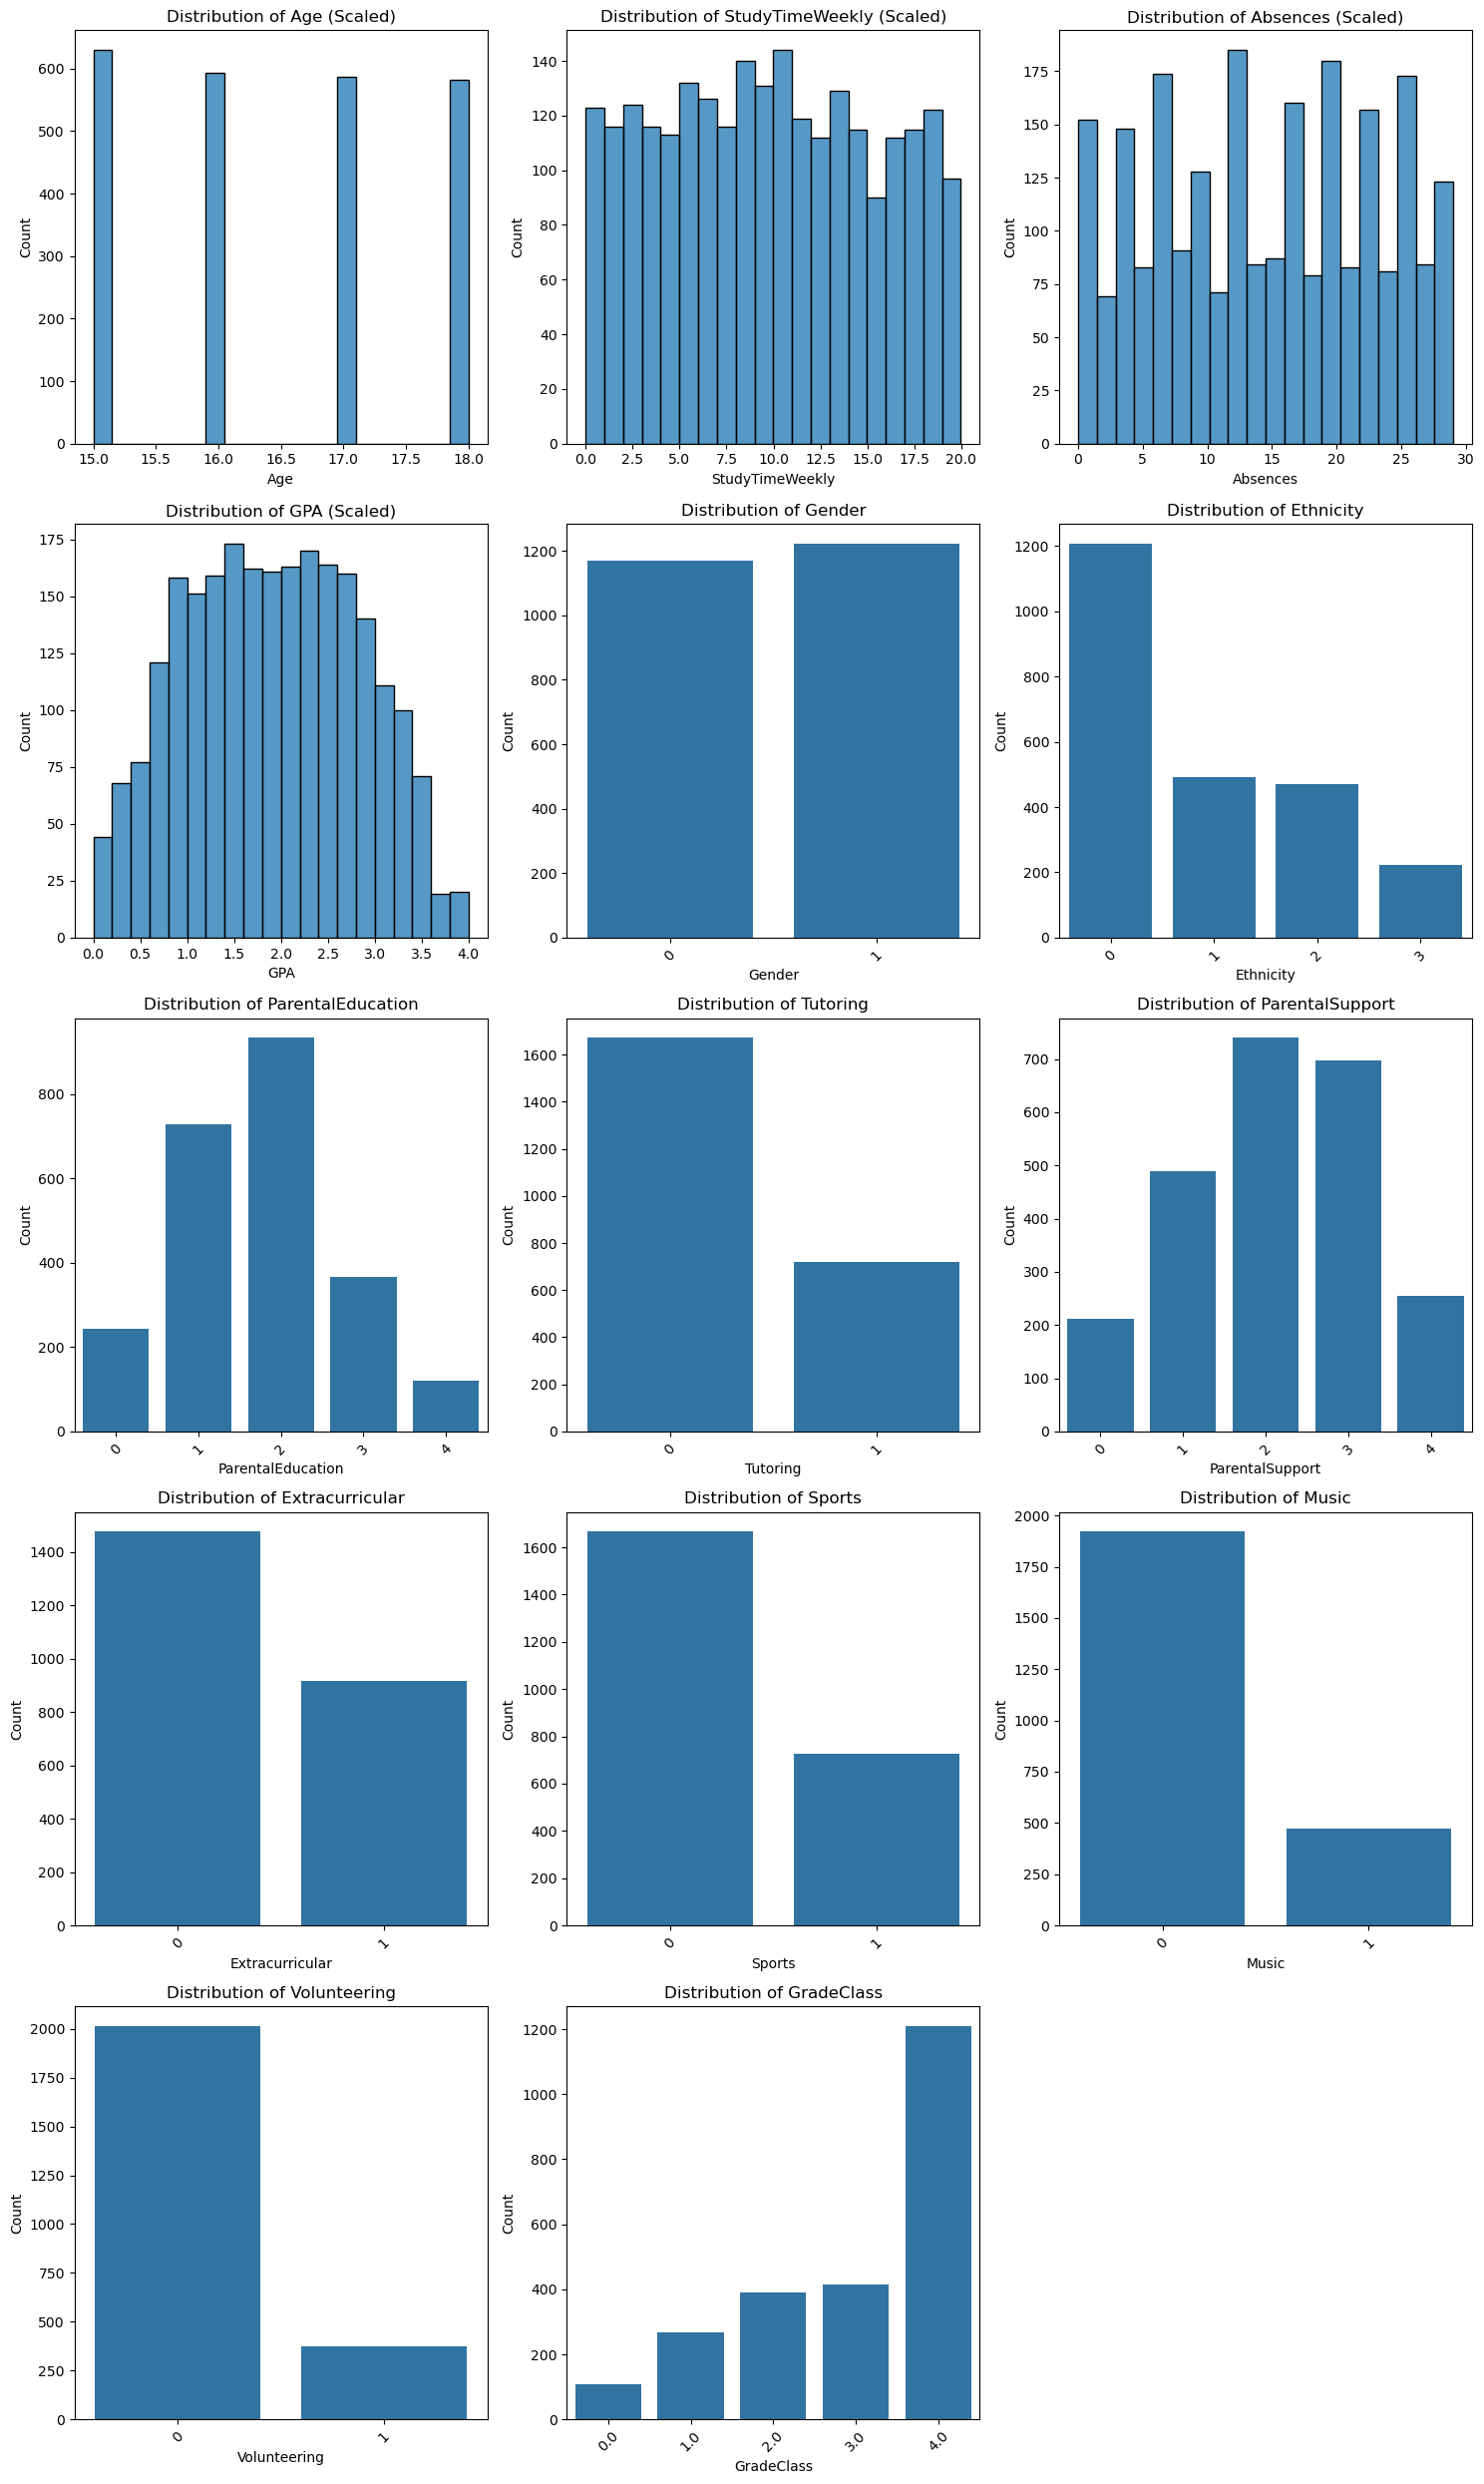

In [5]:
n_cols = 3
n_rows = (len(numerical_features) + len(categorical_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
plot_idx = 0
# for loop to display the histograms for the numerical features
for feature in numerical_features:
    sns.histplot(df[feature], bins=20, ax=axes[plot_idx])
    axes[plot_idx].set_title(f'Distribution of {feature} (Scaled)')
    axes[plot_idx].set_xlabel(feature)
    axes[plot_idx].set_ylabel('Count')
    plot_idx += 1

# for loop to display the histograms for the categorical features
for feature in categorical_features:
    sns.countplot(x=feature, data=df, ax=axes[plot_idx])
    axes[plot_idx].set_title(f'Distribution of {feature}')
    axes[plot_idx].set_xlabel(feature)
    axes[plot_idx].set_ylabel('Count')
    axes[plot_idx].tick_params(axis='x', rotation=45)
    plot_idx += 1

for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Bivariate Analysis

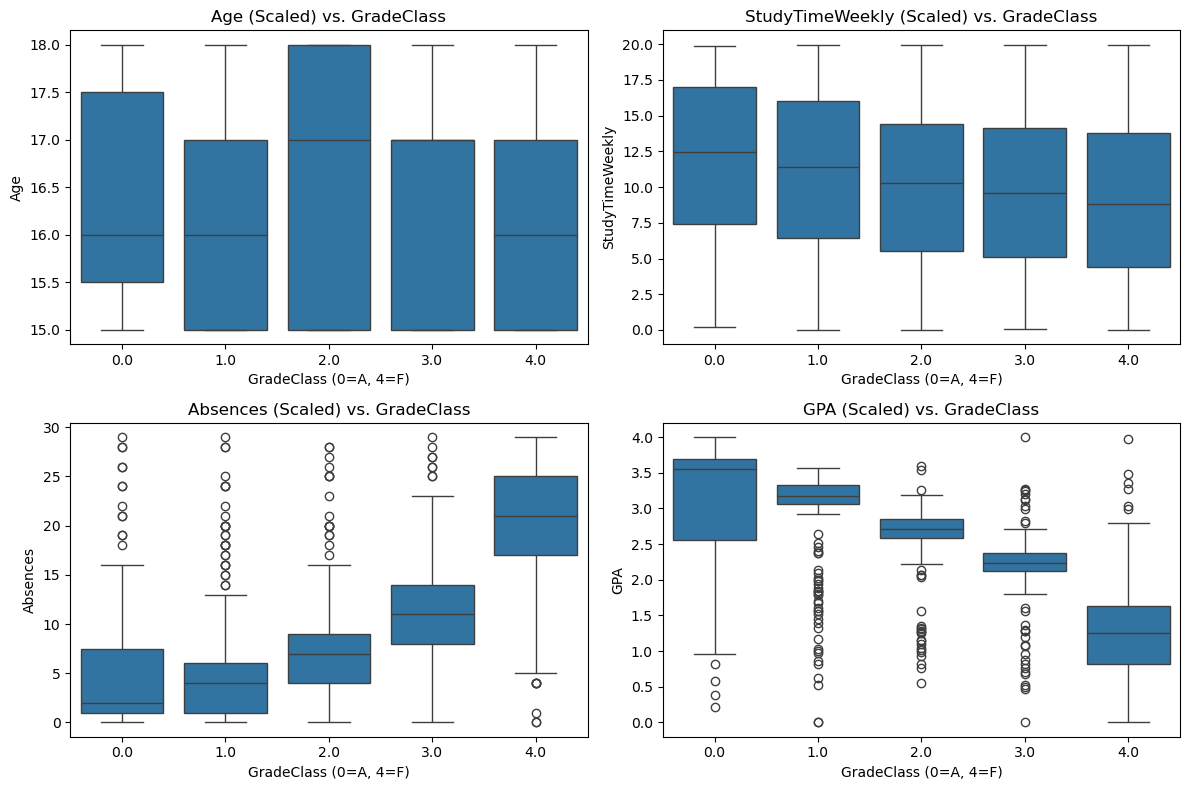

In [6]:
#displays boxplots comparing the gradclass to the other features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for idx, feature in enumerate(numerical_features):
    sns.boxplot(x='GradeClass', y=feature, data=df, ax=axes[idx])
    axes[idx].set_title(f'{feature} (Scaled) vs. GradeClass')
    axes[idx].set_xlabel('GradeClass (0=A, 4=F)')
    axes[idx].set_ylabel(feature)
plt.tight_layout()
plt.show()

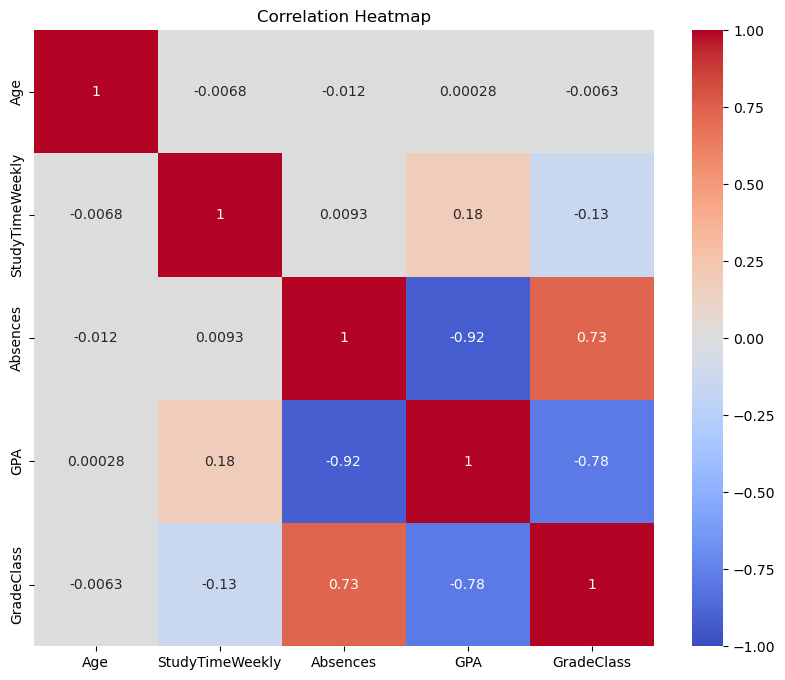

In [7]:
# displays heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['GradeClass']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Print hypothesis validation summary
print("Hypothesis Validation Summary:")
print("\nH1: Students with fewer weekly study hours and higher absence rates are more likely to belong to lower GradeClass categories (D or F).")
print("Observation: Boxplot shows lower median StudyTimeWeekly and higher median Absences for GradeClass 3 (D) and 4 (F). Heatmap likely shows negative correlation for StudyTimeWeekly (~-0.3) and positive for Absences (~0.6) with GradeClass.")

print("\nH2: Students receiving tutoring are more likely to achieve higher grades (GradeClass A or B).")
print("Observation: Point plot shows slightly lower mean GradeClass for Tutoring=1 (~1.3, B/C) vs. Tutoring=0 (~1.6, C), with overlapping error bars.")

print("\nH3: Higher levels of parental education and parental support are positively correlated with better academic performance.")
print("Observation: Point plots show decreasing mean GradeClass for higher ParentalEducation (e.g., 4 ~1.0) and ParentalSupport (e.g., 4 ~0.5), with stronger trend for ParentalSupport.")

print("\nH4: Participation in extracurricular activities, especially music and sports, is associated with improved academic performance.")
print("Observation: Point plots show slightly lower mean GradeClass for Extracurricular=1 (~1.4), Sports=1 (~1.3), Music=1 (~1.3) vs. non-participation (~1.5–1.7), with modest effects.")

print("\nH5: Volunteering is positively correlated with higher GPA and better GradeClass categorisation.")
print("Observation: Point plot shows slightly lower mean GradeClass for Volunteering=1 (~1.4) vs. 0 (~1.6). Boxplot shows slightly higher median GPA for Volunteering=1, with weak effect.")

print("\nH6: There are significant differences in academic performance (GradeClass) across gender and ethnicity groups, potentially highlighting gaps in equitable support.")
print("Observation: Point plots show minimal differences—Gender: Male (~1.5) vs. Female (~1.4); Ethnicity: slight variations (e.g., Asian ~1.3, Other ~1.7), with overlapping error bars.")

Hypothesis Validation Summary:

H1: Students with fewer weekly study hours and higher absence rates are more likely to belong to lower GradeClass categories (D or F).
Observation: Boxplot shows lower median StudyTimeWeekly and higher median Absences for GradeClass 3 (D) and 4 (F). Heatmap likely shows negative correlation for StudyTimeWeekly (~-0.3) and positive for Absences (~0.6) with GradeClass.

H2: Students receiving tutoring are more likely to achieve higher grades (GradeClass A or B).
Observation: Point plot shows slightly lower mean GradeClass for Tutoring=1 (~1.3, B/C) vs. Tutoring=0 (~1.6, C), with overlapping error bars.

H3: Higher levels of parental education and parental support are positively correlated with better academic performance.
Observation: Point plots show decreasing mean GradeClass for higher ParentalEducation (e.g., 4 ~1.0) and ParentalSupport (e.g., 4 ~0.5), with stronger trend for ParentalSupport.

H4: Participation in extracurricular activities, especially